# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

# Insurance Claims Analysis

## Objective

The primary objective is to develop machine learning to predict whether an insurance claim is fraudulent. 

## Imports and Dataset

In [1139]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures




In [1140]:
df = pd.read_csv("insurance_claims.csv")

In [1141]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


In [1142]:
insurance_claims_df = pd.read_csv('insurance_claims.csv')

## Inspect the data

In [1143]:
print(df.head())
print(df.info())
print(df.describe())

   months_as_customer   age  policy_number policy_bind_date policy_state  \
0                 328  48.0         521585       2014-10-17           OH   
1                 228  42.0         342868       2006-06-27           IN   
2                 134  29.0         687698       2000-09-06           OH   
3                 256  41.0         227811       1990-05-25           IL   
4                 228  44.0         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500             1000.0                1406.91               0   
1    250/500             2000.0                1197.22         5000000   
2    100/300             2000.0                1413.14         5000000   
3    250/500             2000.0                1415.74         6000000   
4   500/1000             1000.0                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...

### Missing Values

In [1144]:
null_counts = df.isnull().sum()
null_counts

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             2
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## Handling Missing Values

In [1145]:
insurance_claims_df.replace('?', pd.NA, inplace=True)

In [1146]:
insurance_claims_df['policy_bind_date'] = pd.to_datetime(insurance_claims_df['policy_bind_date'])

In [1147]:
insurance_claims_df['policy_bind_year'] = insurance_claims_df['policy_bind_date'].dt.year
insurance_claims_df['policy_bind_month'] = insurance_claims_df['policy_bind_date'].dt.month
insurance_claims_df['policy_bind_day'] = insurance_claims_df['policy_bind_date'].dt.day

In [1148]:
insurance_claims_df.drop(columns=['policy_bind_date'], inplace=True)

In [1149]:
numerical_columns = insurance_claims_df.select_dtypes(include=['float64', 'int64']).columns
insurance_claims_df[numerical_columns] = insurance_claims_df[numerical_columns].fillna(insurance_claims_df[numerical_columns].mean())



## Encoding Categorical Variables

In [1150]:
categorical_columns = insurance_claims_df.select_dtypes(include=['object']).columns
insurance_claims_df[categorical_columns] = insurance_claims_df[categorical_columns].fillna(insurance_claims_df[categorical_columns].mode().iloc[0])

In [1151]:
if '_c39' in insurance_claims_df.columns:
    insurance_claims_df.drop(columns=['_c39'], inplace=True)

In [1152]:
numerical_columns = insurance_claims_df.select_dtypes(include=['float64', 'int64']).columns


In [1153]:
if not (insurance_claims_df.replace([np.inf, -np.inf], np.nan).dropna().shape[0] == insurance_claims_df.shape[0]):
    raise ValueError("The dataset contains infinity or extremely large values.")

In [1154]:
assert insurance_claims_df.isnull().sum().sum() == 0

In [1155]:
if 'fraud_reported' in insurance_claims_df.columns:
    label_enc = LabelEncoder()
    binary_columns = ['fraud_reported', 'police_report_available']
    for col in binary_columns:
        insurance_claims_df[col] = label_enc.fit_transform(insurance_claims_df[col])

In [1156]:
categorical_columns = insurance_claims_df.select_dtypes(include=['object']).columns
insurance_claims_df = pd.get_dummies(insurance_claims_df, columns=categorical_columns, drop_first=True)


## Feature Scaling

In [1157]:
scaler = StandardScaler()
scaled_numerical_columns = scaler.fit_transform(insurance_claims_df[numerical_columns])
insurance_claims_df[numerical_columns] = scaled_numerical_columns

In [1158]:
insurance_claims_df['premium_deductible_ratio'] = insurance_claims_df['policy_annual_premium'] / insurance_claims_df['policy_deductable']

In [1159]:
insurance_claims_df['premium_deductible_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [1160]:
insurance_claims_df['premium_deductible_ratio'].fillna(insurance_claims_df['premium_deductible_ratio'].mean(), inplace=True)

In [1161]:
remaining_na = insurance_claims_df.isnull().sum()
if remaining_na.sum() > 0:
    print("Columns with remaining NaN values:")
    print(remaining_na[remaining_na > 0])
    raise ValueError("There are still missing values in the dataset.")
    
if not (insurance_claims_df.replace([np.inf, -np.inf], np.nan).dropna().shape[0] == insurance_claims_df.shape[0]):
    raise ValueError("The dataset contains infinity or extremely large values.")

In [1162]:
infinite_large_values = insurance_claims_df.replace([np.inf, -np.inf], np.nan)
infinite_large_columns = infinite_large_values.columns[infinite_large_values.isnull().any()].tolist()
if infinite_large_columns:
    print("Columns with infinite or extremely large values:")
    print(infinite_large_columns)
    raise ValueError("The dataset contains infinity or extremely large values.")

In [1163]:
print(insurance_claims_df.head())

   months_as_customer       age  policy_number  policy_deductable  \
0            1.078140  0.990721      -0.095953          -0.219992   
1            0.208995  0.332950      -0.791527           1.418454   
2           -0.608002 -1.092221       0.550566           1.418454   
3            0.452355  0.223321      -1.239334           1.418454   
4            0.208995  0.552207      -0.695834          -0.219992   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0               0.614945       -0.479476    -0.489529       1.010347   
1              -0.245230        1.697980    -0.461008      -0.904472   
2               0.640501        1.697980    -0.984885       0.356506   
3               0.651167        2.133471     1.491682       0.852276   
4               1.341021        2.133471     1.527808       1.466598   

   capital-loss  incident_hour_of_the_day  ...  auto_model_RAM  \
0      0.953851                 -0.956261  ...               0   
1      0.953851     

## Dataset Splitting

In [1164]:
X = insurance_claims_df.drop(columns=['fraud_reported'])
y = insurance_claims_df['fraud_reported']

In [1165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [1166]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 1205)
X_test shape: (200, 1205)
y_train shape: (800,)
y_test shape: (200,)


In [1167]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1168]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


### Binding Numeric Data

In [1169]:
df_new.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Contract Years,total_premiums_paid,net_value_of_customer
count,1000.000000,998.000000,1000.000000,998.000000,997.000000,1.000000e+03,1000.000000,998.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,996.000000,999.000000,999.000000,1000.000000,1000.000000,1000.000000,997.000000,993.000000
mean,203.954000,38.962926,546238.648000,1134.268537,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,11.644000,...,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000,16.996167,21335.099034,-31326.339001
std,115.113174,9.135425,257063.005276,611.251914,244.265051,2.297407e+06,71701.610941,27877.379027,28104.096686,6.951373,...,0.820127,1.111335,26405.348039,4883.158265,4827.050887,18886.252893,6.015861,9.592765,12808.154550,28607.232702
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,0.000000,0.000000,-98696.934167
25%,115.750000,32.000000,335980.250000,500.000000,1090.320000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,0.000000,1.000000,41812.500000,4290.000000,4440.000000,30292.500000,2000.000000,9.645833,11321.310000,-52424.405000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,1.000000,1.000000,57935.000000,6780.000000,6750.000000,42100.000000,2005.000000,16.625000,20330.850000,-35276.533333
75%,276.250000,44.000000,759099.750000,2000.000000,1415.740000,0.000000e+00,603251.000000,51075.000000,0.000000,17.000000,...,2.000000,2.000000,70620.000000,11310.000000,10890.000000,50822.500000,2010.000000,23.020833,29412.413333,-14334.706667
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,39.916667,67916.070833,48515.443333


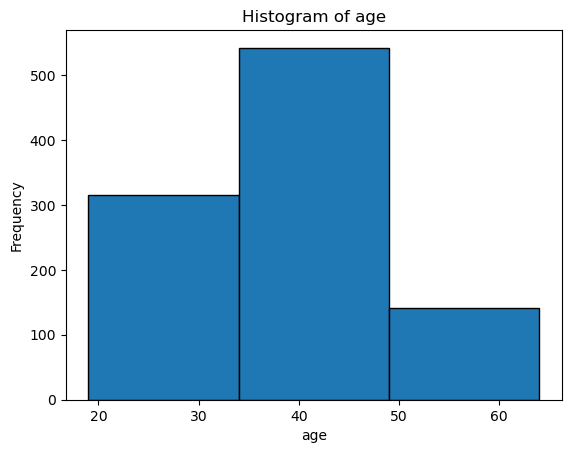

In [1170]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [1171]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [1172]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


In [1173]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['customer_category'] = pd.cut(df_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [1174]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Creating New Features

In [1175]:
df_new["Contract Years"] = df_new["months_as_customer"]/12

In [1176]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Polynomial Features

In [1177]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(insurance_claims_df[numerical_columns])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_columns))
insurance_claims_df = pd.concat([insurance_claims_df, poly_features_df], axis=1)

## Feature Joining

In [1178]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [1179]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


In [1180]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [1181]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Saving the csv for late

In [1182]:
df_new.to_csv('Advanced Features Claims Data.csv')

## Training Model

In [1183]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [1184]:
y_pred = model.predict(X_test)

In [1185]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [1186]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.785
Precision: 0.59375
Recall: 0.3877551020408163
F1 Score: 0.46913580246913583
Confusion Matrix:
[[138  13]
 [ 30  19]]


## Model Comparison

In [1187]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [1188]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Model: Random Forest
Accuracy: 0.755
Precision: 0.5
Recall: 0.02040816326530612
F1 Score: 0.039215686274509796
Confusion Matrix:
[[150   1]
 [ 48   1]]


Model: Logistic Regression
Accuracy: 0.785
Precision: 0.59375
Recall: 0.3877551020408163
F1 Score: 0.46913580246913583
Confusion Matrix:
[[138  13]
 [ 30  19]]


Model: SVM
Accuracy: 0.76
Precision: 1.0
Recall: 0.02040816326530612
F1 Score: 0.039999999999999994
Confusion Matrix:
[[151   0]
 [ 48   1]]


Model: Gradient Boosting
Accuracy: 0.775
Precision: 0.5588235294117647
Recall: 0.3877551020408163
F1 Score: 0.4578313253012048
Confusion Matrix:
[[136  15]
 [ 30  19]]




## Summary
Random Forest and SVM: Both models are very conservative, resulting in high accuracy but poor recall and F1 scores. They miss almost all fraudulent claims.
Logistic Regression and Gradient Boosting: Both models show a better balance between precision and recall, resulting in higher F1 scores. They are better at identifying fraudulent claims but still have room for improvement.

In [1189]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [1190]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

In [1191]:
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                              param_grid=param_grid_lr,
                              cv=5,
                              scoring='f1',
                              n_jobs=-1)

In [1192]:
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=param_grid_gb,
                              cv=5,
                              scoring='f1',
                              n_jobs=-1)

In [1193]:
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_
print(f"Best parameters for Logistic Regression: {best_params_lr}")

Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}


In [1194]:
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
print(f"Best parameters for Gradient Boosting: {best_params_gb}")

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [1195]:
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)
print("Logistic Regression with Best Hyperparameters")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression with Best Hyperparameters
Accuracy: 0.795
Precision: 0.6111111111111112
Recall: 0.4489795918367347
F1 Score: 0.5176470588235293
Confusion Matrix:
[[137  14]
 [ 27  22]]


In [1196]:
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)
print("Gradient Boosting with Best Hyperparameters")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Precision: {precision_score(y_test, y_pred_gb)}")
print(f"Recall: {recall_score(y_test, y_pred_gb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting with Best Hyperparameters
Accuracy: 0.775
Precision: 0.5588235294117647
Recall: 0.3877551020408163
F1 Score: 0.4578313253012048
Confusion Matrix:
[[136  15]
 [ 30  19]]


## Go wild

Go out a see what other features you can create that will be useful for our visualisations

In [1197]:
## 